<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">EDA</h1>

In [3]:
df.shape

(20640, 10)

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Null Values</h1>

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/1460)*100})
missing_data

,total_missing,perc_missing
longitude,0,0.0
latitude,0,0.0
housing_median_age,0,0.0
total_rooms,0,0.0
total_bedrooms,0,0.0
population,0,0.0
households,0,0.0
median_income,0,0.0
ocean_proximity,0,0.0
median_house_value,0,0.0


In [10]:
df.shape

(20433, 10)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

In [11]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [12]:
dummies = pd.get_dummies(df.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [13]:
DF = df.join(dummies)
DF

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,False,True,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,False,True,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,False,True,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,False,True,False,False,False


In [14]:
DF = DF.drop(["ocean_proximity"], axis=1)
DF

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,False,True,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,False,True,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,False,True,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,False,True,False,False,False


In [15]:
DF['<1H OCEAN'] = DF['<1H OCEAN'].astype(int)
DF["INLAND"] = DF["INLAND"].astype(int)
DF["NEAR OCEAN"] = DF["NEAR OCEAN"].astype(int)
DF["NEAR BAY"] = DF["NEAR BAY"].astype(int)
DF["ISLAND"] = DF["ISLAND"].astype(int)

In [16]:
DF


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualization</h1>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

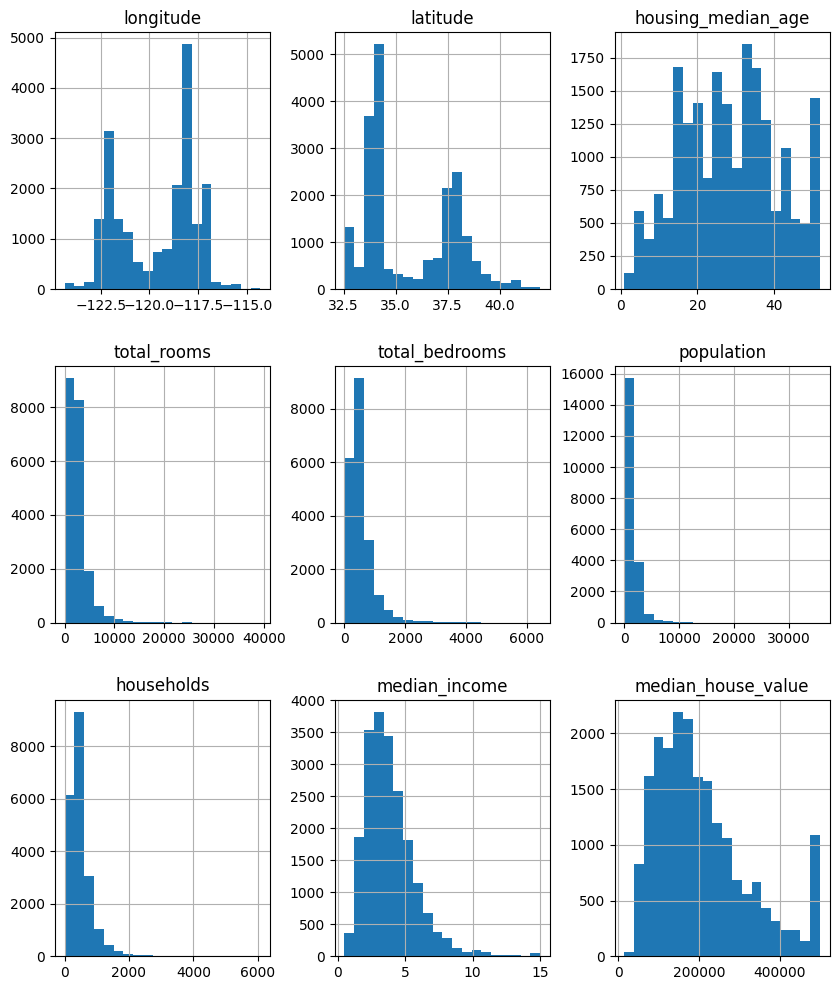

In [17]:
df.hist(figsize=(10, 12), bins=20)

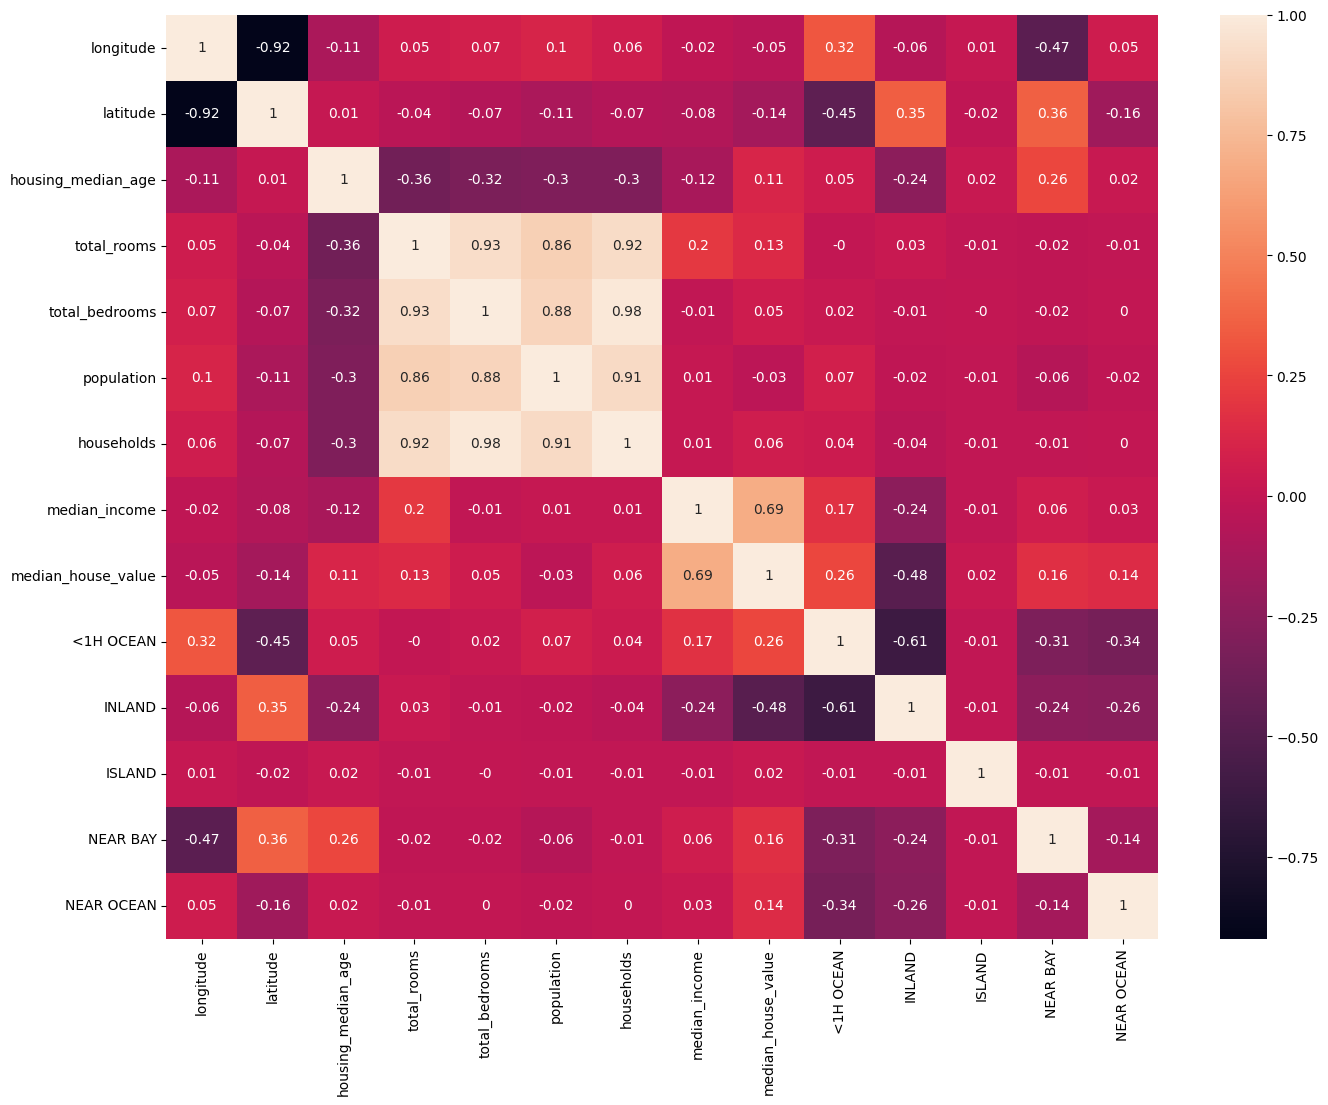

In [18]:
plt.subplots(figsize=(16, 12))
correlation = DF.corr().round(2)
sns_plot = sns.heatmap(correlation, annot=True)

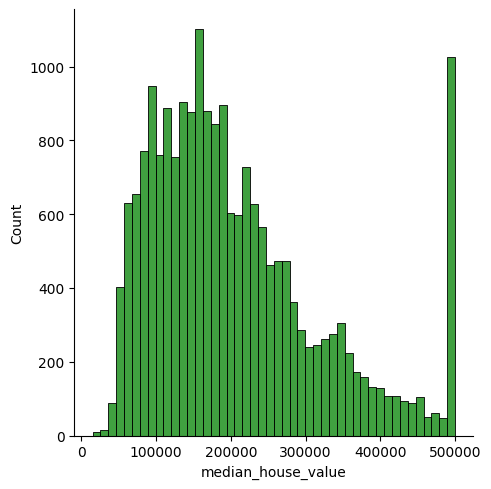

In [30]:
sns.displot(df['median_house_value'], color='green')

In [19]:
# sns.pairplot(DF)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Outliers</h1>

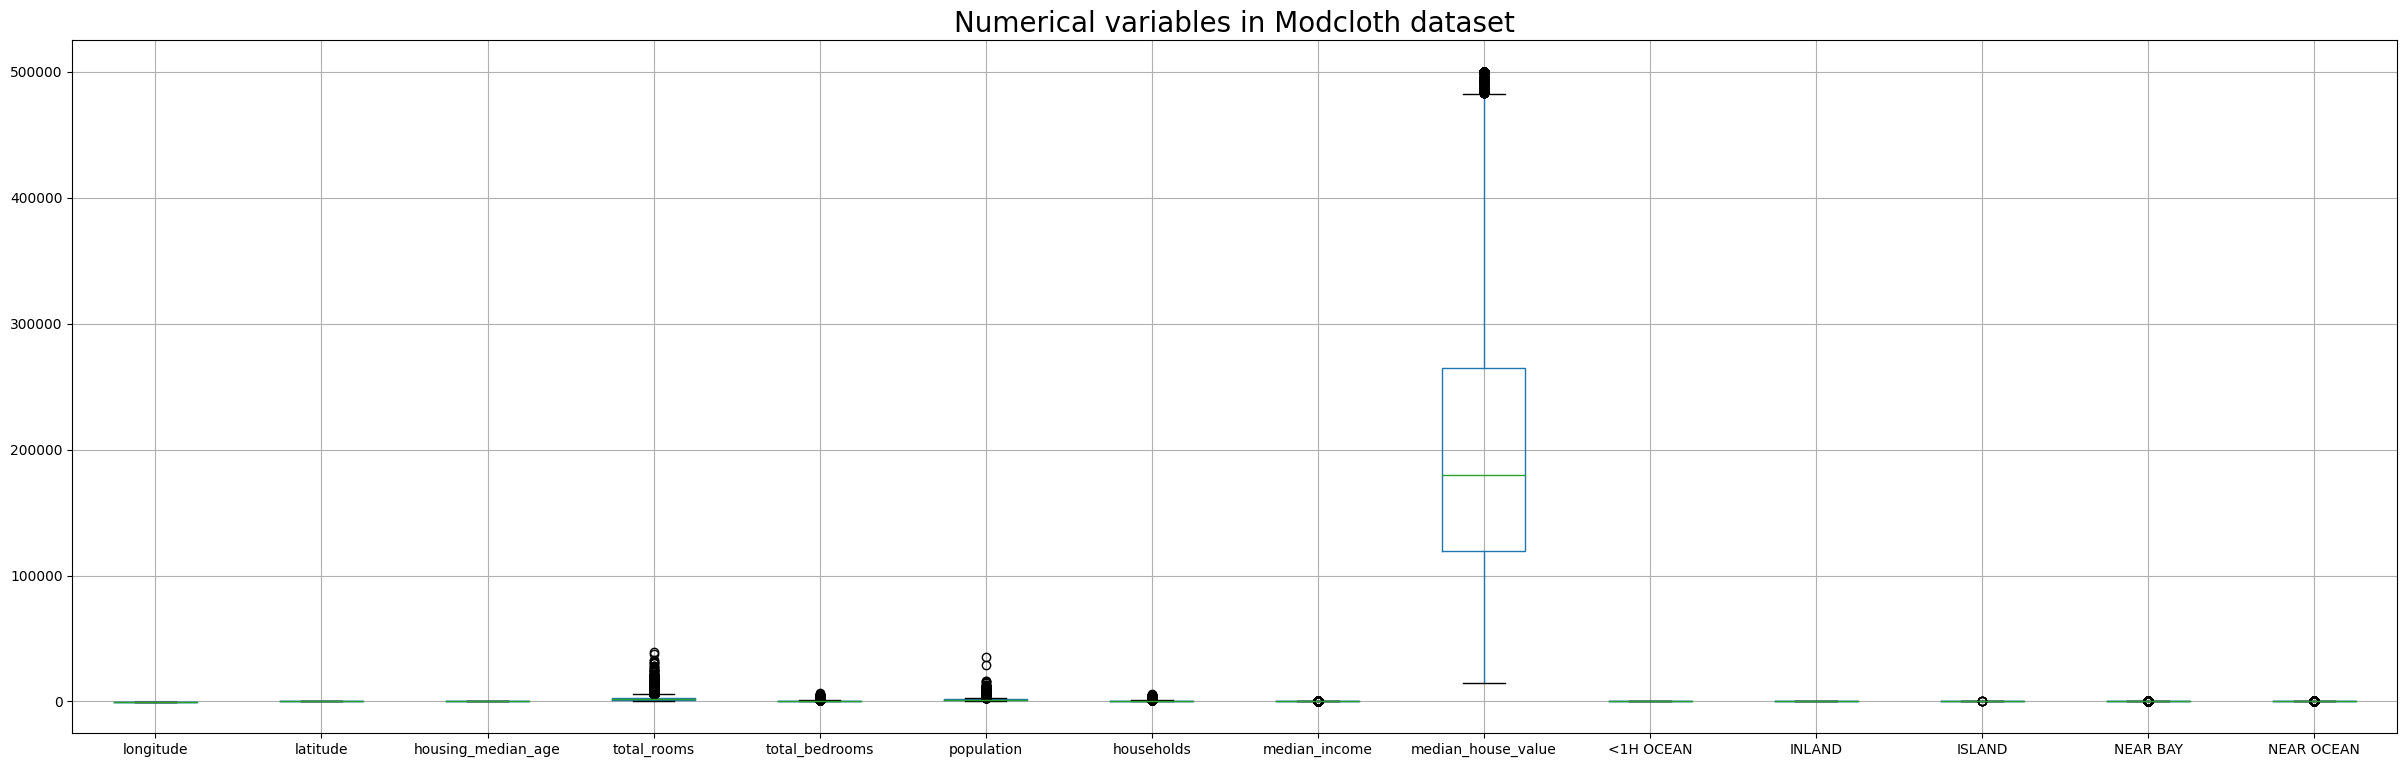

In [20]:
plt.figure(figsize=(30, 9))
DF.boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

In [21]:
X = DF.drop(["median_house_value"], axis=1)
Y = DF["median_house_value"]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standard Scaler</h1>

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Preparing Evaluation Metrics</h1>

In [24]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y,scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">1- Linear Regression</h2>

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "RMSE": rmse,"R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models.loc[len(models.index)] = new_row


print("-"*50)

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': predictions
})


results_df.head(10)

MAE: 50413.433308100575
MSE: 4802173538.6041565
RMSE: 69297.71669113028
R2 Score: 0.6488402154431996
------------------------------
RMSE Cross-Validation: 21920111625849.418
--------------------------------------------------


,Actual Values,Predicted Values
0,245800,201882.959868
1,137900,147279.682144
2,218200,207796.609798
3,220800,180487.576722
4,170500,190323.923130
5,75000,95437.897104
6,269400,287156.451612
7,228900,257624.771805
8,500001,385383.556151
9,80800,62548.197551


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">2- Lsaao</h2>

In [26]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso", "MAE": mae, "MSE": mse, "RMSE": rmse,
"R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models.loc[len(models.index)] = new_row


print("-"*50)

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': predictions
})


results_df.head(10)

MAE: 50411.32263890727
MSE: 4801403591.909555
RMSE: 69292.16111444033
R2 Score: 0.648896517930651
------------------------------
RMSE Cross-Validation: 73559.11265071326
--------------------------------------------------


,Actual Values,Predicted Values
0,245800,201873.056154
1,137900,147282.323442
2,218200,207799.511101
3,220800,180477.314957
4,170500,190332.775249
5,75000,95447.188852
6,269400,287160.317232
7,228900,257626.625692
8,500001,385375.703380
9,80800,62547.903952


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">3- Ridge</h2>

In [27]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge", "MAE": mae, "MSE": mse, "RMSE": rmse,"R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models.loc[len(models.index)] = new_row


print("-"*50)

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': predictions
})


results_df.head(10)

MAE: 50393.51286316704
MSE: 4796173844.016794
RMSE: 69254.41389555467
R2 Score: 0.6492789441650519
------------------------------
RMSE Cross-Validation: 73559.42688738406
--------------------------------------------------


,Actual Values,Predicted Values
0,245800,201899.586675
1,137900,147277.815228
2,218200,207804.007398
3,220800,180501.771058
4,170500,190353.643767
5,75000,95460.202250
6,269400,287147.954798
7,228900,257626.895346
8,500001,385397.563926
9,80800,62507.714487


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Models Comparsion</h2>

In [ ]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,50413.433308,4.802174e+09,69297.716691,0.648840,2.192011e+13
1,Lasso,50411.322639,4.801404e+09,69292.161114,0.648897,7.355911e+04
2,Ridge,50393.512863,4.796174e+09,69254.413896,0.649279,7.355943e+04


<center><h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Thank you so much for reading notebook. Preparing this notebook took me a great deal of time. If you liked it, please do not forget to give Like. Peace Out ✌️ ...</h2></center>